# Audio Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 44

def seed():
    np.random.seed(RANDOM_STATE)

seed()

In [3]:
data_train = np.loadtxt("ae.train")
data_test = np.loadtxt("ae.test")

In [4]:
def get_labels(data, block_lens):
    """
    return format of X:
        - array of recordings
        - per recording:
            - each row is a recording frame (time step), beware varies! 
            - each column is a channel (always 12)
    """
    X = []
    y = []
    prev_row_idx = 0
    speaker_num = 0
    count = 0

    for i in range(data.shape[0]): # go through all rows
        
        # check each row 
        # rows of 1 indicate new recording
        if np.all(data[i,:] == 1):
            
            X.append(data[prev_row_idx:i,:])
            prev_row_idx = i + 1 # plus 1 to not include row of 1's
            
            y.append(speaker_num)
            count += 1 # count examples per speaker
            
            if count == block_lens[speaker_num]:
                count = 0
                speaker_num += 1 # next class
                
    return X, y

In [5]:
train_block_lens = [30] * 9
test_block_lens = [31, 35, 88, 44, 29, 24, 40, 50, 29]

X_train, y_train = get_labels(data_train, train_block_lens)
X_test, y_test = get_labels(data_test, test_block_lens)

In [6]:
def plot_recording(ax, rec_data, title=None):
    [ax.plot(x) for x in rec_data]
    ax.set_xlim(0, 22)
    ax.set_ylim(-1.5, 2)
    if title:
        ax.title.set_text(title)

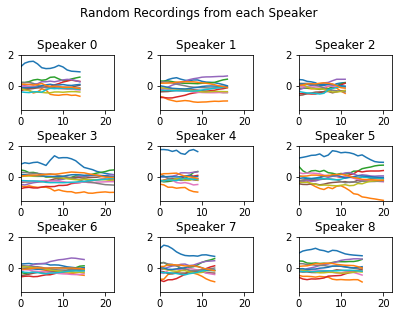

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=3)
fig.tight_layout(pad=1.5)

max_range = 30
min_range = 0
count = 0

for row in ax:
    for col in row:
        random_point = np.random.randint(min_range, max_range)
        min_range += 30
        max_range += 30
        plot_recording(col, X_train[random_point].T, title="Speaker " + str(count))
        count += 1

seed()
fig.suptitle("Random Recordings from each Speaker", y=1.1)
plt.show()